In [1]:
import json
import os

In [2]:
annotations = json.load(open('/root/thomas/mask/data/annotations.json'))
download = False

## download the data

In [3]:
# to download the data
if download:
    for a in annotations:
        name = os.path.basename(a['content'])
        video_name = a['content'].split('/')[-2]
        if '://s' not in a['content']:
            url = a['c ontent']
            url = url.replace(':/s', '://s')
        else:
            url = a['content']
        command = 'wget {} --directory-prefix=data/{}'.format(url, video_name)
        os.system(command)


## display some examples

In [13]:
import random
import itertools
import colorsys
import numpy as np
from skimage.measure import find_contours
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines
from matplotlib.patches import Polygon, Rectangle, Circle
import IPython.display

from PIL import Image

In [5]:
def apply_mask(image, mask, color, alpha=0.5):
    """Apply the given mask to the image.
    """
    for c in range(3):
        image[:, :, c] = np.where(mask == 1,
                                  image[:, :, c] *
                                  (1 - alpha) + alpha * color[c] * 255,
                                  image[:, :, c])
    return image

In [6]:
def random_colors(N, bright=True):
    """
    Generate random colors.
    To get visually distinct colors, generate them in HSV space then
    convert to RGB.
    """
    brightness = 1.0 if bright else 0.7
    hsv = [(i / N, 1, brightness) for i in range(N)]
    colors = list(map(lambda c: colorsys.hsv_to_rgb(*c), hsv))
    random.shuffle(colors)
    return colors

In [9]:
figsize = (16, 16)
annot = np.random.choice(annotations)
image_path = os.path.join('/root/thomas/mask/data', '/'.join(annot['content'].split('/')[-2:]))
masks = annot['results']

/root/thomas/mask/data/testfile_piece_28.mp4/frame_20.png


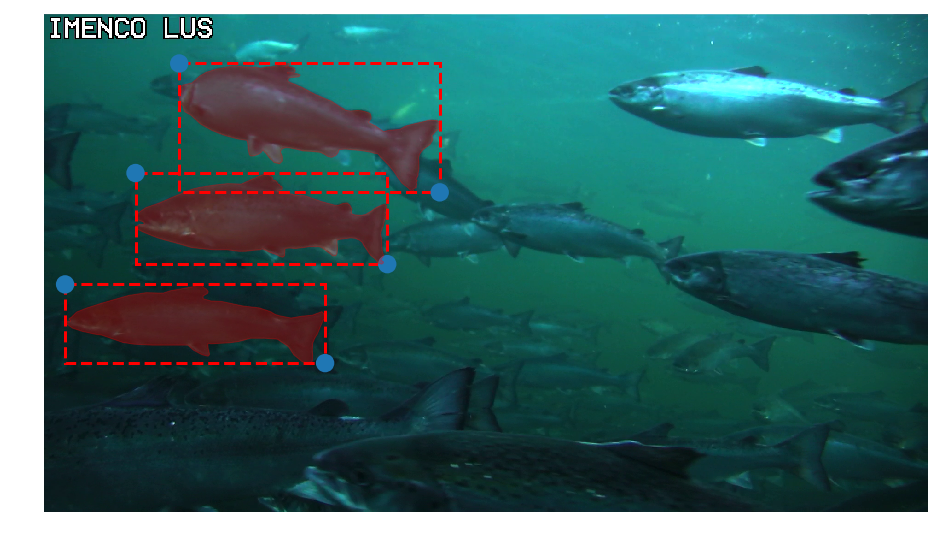

In [18]:
print image_path
image = np.array(Image.open(image_path))
N = len(masks)
_, ax = plt.subplots(1, figsize=figsize)

# Generate random colors
colors = random_colors(N)

# Show area outside image boundaries.Polygon
height, width = image.shape[:2]
ax.set_ylim(height + 10, -10)
ax.set_xlim(-10, width + 10)
ax.axis('off')

masked_image = image.astype(np.uint32).copy()
for i in range(N):#     # print np.where(mask==1)
    color = colors[i]
    test = [(i1, 1080 - i2) for (i1, i2) in masks[i]]
    xs, ys = zip(*test)
    p = Rectangle([min(xs), min(ys)], (max(xs)-min(xs)), (max(ys)-min(ys)), 
                  facecolor='none', 
                  edgecolor=colors[i],
                  linestyle='dashed',
                  linewidth=3)
    ax.add_patch(p)
    p = Circle([min(xs), min(ys)], radius = 10)
    ax.add_patch(p)
    p = Circle([min(xs)+(max(xs)-min(xs)), min(ys)+(max(ys)-min(ys))], radius = 10)
    ax.add_patch(p)
    p = Polygon(test, facecolor=colors[i], edgecolor=colors[i], alpha=0.3)
    ax.add_patch(p)
    
ax.imshow(masked_image.astype(np.uint8))
plt.show()


In [ ]:
# from shapely.geometry import Point
# from shapely.geometry import Polygon

In [ ]:
# im = Image.open(image_path).convert('RGBA')
# pixels = np.array(im)
# im_copy = np.array(im)

# region = Polygon(test)

# for index, pixel in np.ndenumerate(pixels):
#   # Unpack the index.masks[0]
#     row, col, channel = index
#   # We only need to look at spatial pixel data for one of the four channels.
#     if channel != 0:
#         continue
#     point = Point(row, col)
#     if not region.contains(point):
#         im_copy[(row, col, 0)] = 255
#         im_copy[(row, col, 1)] = 255
#         im_copy[(row, col, 2)] = 255
#         im_copy[(row, col, 3)] = 0

# cut_image = Image.fromarray(im_copy)